# HOMEWORK 3
# COSC 3337 Dr.Rizk

In [1]:
%load_ext watermark
%watermark -d -u -a '<Kim Nguyen>' -v -p numpy,scipy,matplotlib,sklearn,mlxtend

<Kim Nguyen> 
last updated: 2020-06-27 

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
scipy 1.4.1
matplotlib 3.1.3
sklearn 0.22.1
mlxtend 0.17.2


In [2]:
# Remove FutureWarning
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## 1. Hyperparameter Tuning and Model Selection

### 1.1 Using Grid Search for Hyperparameter Tuning

In [3]:
import pandas as pd

df = pd.read_csv('wdbc.data', header=None)

# convert class label "M"->1 and label "B"->0
df[1] = df[1].apply(lambda x: 1 if x == 'M' else 0)

df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.model_selection import train_test_split

y = df[1].values
X = df.loc[:, 2:].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0,stratify=y)

Use GridSearchCV from scikit-learn to find the best parameter for n_neighbors of a KNearestNeighborClassifier

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline ( StandardScaler(), KNeighborsClassifier() ) # YOUR CODE HERE

param_grid = [{'kneighborsclassifier__n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]}] # YOUR CODE HERE

gs = GridSearchCV(pipe, # YOUR CODE HERE
                 param_grid, # YOUR CODE HERE
                 iid=False,
                 n_jobs=-1,
                 refit=True,
                 scoring='accuracy',
                 cv=10)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))

Best Accuracy: 97.24%


Print the best parameters obtained from the GridSearchCV run and compute the accuracy a KNearestNeighborClassifier would achieve with these settings on the test set (X_test, y_test).

In [7]:
gs.fit(X_test, y_test)
print('Best Params: %s' % (gs.best_params_))# YOUR CODE HERE
print('Test Accuracy: %.2f%%' % (gs.best_score_*100))# YOUR CODE HERE)

Best Params: {'kneighborsclassifier__n_neighbors': 5}
Test Accuracy: 95.92%


### 1.2 Estimate the Generalization Performance using the ‘.632+’ Bootstrap

In [8]:
from mlxtend.evaluate import bootstrap_point632_score
import numpy as np

scores = bootstrap_point632_score (gs, X_test, y_test, random_seed = 1, method = '.632+') # YOUR CODE HERE
    
acc = np.mean(scores) # YOUR CODE HERE
print('Accuracy: %.2f%%' % (100*acc))

Accuracy: 95.67%


In [9]:
lower = np.percentile(scores, 5) # YOUR CODE
upper = np.percentile(scores, 95) # YOUR CODE
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

95% Confidence interval: [92.84, 97.99]


## 2. Confusion Matrices

### 2.1 Contructing a Binary Confusion Matrix

In [10]:
%matplotlib inline

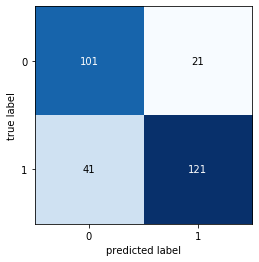

In [11]:
import numpy as np
from helper import plot_confusion_matrix
import matplotlib.pyplot as plt

example_cm = np.array([[101, 21],
                       [41, 121]])

plot_confusion_matrix(example_cm)
plt.show()

##### In both true label and predicted label, 0 is Positive and 1 is Negative 

In [12]:
y_true = np.array     ([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,1, 0])
y_predicted = np.array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,0, 0])

def confusion_matrix_binary(y_true, y_predicted):
    
    tp, fn, fp, tn = 0, 0, 0, 0
    
    for i, j in zip(y_true, y_predicted):
        if i == j:
            if i == 0:
                tp += 1
            else:
                tn += 1
        else:
            if i == 0:
                fn += 1
            else:
                fp += 1
            
    conf_matrix = np.zeros(4).reshape(2, 2).astype(int)
    conf_matrix[0, 0] = tp
    conf_matrix[0, 1] = fn
    conf_matrix[1, 0] = fp
    conf_matrix[1, 1] = tn
    
    return conf_matrix

result_matrix = confusion_matrix_binary(y_true, y_predicted)

In [13]:
print('Conusion matrix array:\n', result_matrix)

Conusion matrix array:
 [[7 0]
 [4 9]]


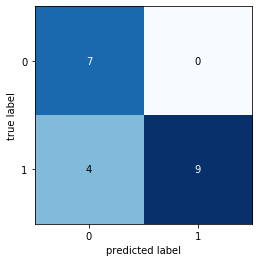

In [14]:
plot_confusion_matrix(result_matrix)
plt.show()

### 2.2 Constructing a Multiclass Confusion Matrix

In [15]:
import numpy as np

def confusion_matrix_multiclass(y_true, y_predicted):
    
    # YOUR CODE (As many lines of code as you like)
    
    # Find maximum elemnt in data that is the number of classes in data
    classes = max(y_true) if max(y_true)>max(y_predicted) else max(y_predicted)
    # Creating the numpy array with Zero elements to store the confusion matrix
    con_matrix = np.zeros ((classes+1, classes+1))
   
    for i in range(len(y_true)):
        # Store the data of ith position in y_true
        true = y_true[i]
        # Store the data of ith position in y_predicted
        predicted=y_predicted[i]
        
        if(true==predicted): # if predicted value is true value
            con_matrix[true][predicted]=con_matrix[true][predicted]+1 
        else:
            con_matrix[true][predicted]=con_matrix[true][predicted]+1 
    return con_matrix.astype(int) # returning the confusion matrix

  

y_true = [1, 1, 1, 1, 0, 2, 0, 3, 4, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0]
y_predicted = [1, 0, 1, 1, 0, 2, 1, 3, 4, 2, 2, 0, 2, 1, 2, 1, 0, 3, 1, 1]

result_matrix = confusion_matrix_multiclass(y_true, y_predicted)
result_matrix

array([[2, 2, 0, 0, 0],
       [1, 6, 1, 1, 0],
       [1, 0, 4, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

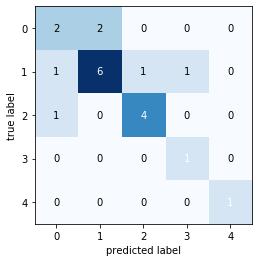

In [16]:
from helper import plot_confusion_matrix

plot_confusion_matrix(result_matrix)
plt.show()

### 2.3 Binary Confusion Matrices for Multiclass Problems

In [17]:
# MODIFY THIS CELL

def binary_cm_from_multiclass(y_true, y_predicted, positive_label):
    
    y_true_ary = np.array(y_true)
    y_predicted_ary = np.array(y_predicted)

    y_true_mod = np.where (y_true_ary == positive_label, 0, 1) # YOUR CODE
    y_predicted_mod = np.where (y_predicted_ary == positive_label, 0, 1) # YOUR CODE
        
    cm = confusion_matrix_binary(y_true_mod, y_predicted_mod)
    return cm

Positive Label 0:
 [[ 2  2]
 [ 2 14]]


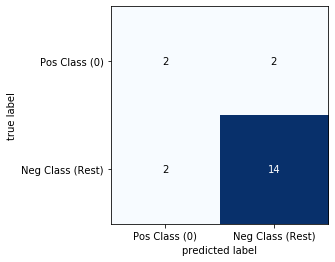

In [18]:
y_true =      [1, 1, 1, 1, 0, 2, 0, 3, 4, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0]
y_predicted = [1, 0, 1, 1, 0, 2, 1, 3, 4, 2, 2, 0, 2, 1, 2, 1, 0, 3, 1, 1]

mat_pos0 = binary_cm_from_multiclass(y_true, y_predicted, positive_label=0)
print('Positive Label 0:\n', mat_pos0)

fig, ax = plot_confusion_matrix(mat_pos0)
ax.set_xticklabels(['', 'Pos Class (0)', 'Neg Class (Rest)'])
ax.set_yticklabels(['', 'Pos Class (0)', 'Neg Class (Rest)']);



Positive Label 1:
 [[6 3]
 [2 9]]


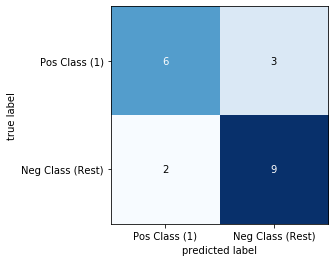

In [19]:
mat_pos1 = binary_cm_from_multiclass(y_true, y_predicted, positive_label=1)
print('\n\nPositive Label 1:\n', mat_pos1)

fig, ax = plot_confusion_matrix(mat_pos1)
ax.set_xticklabels(['', 'Pos Class (1)', 'Neg Class (Rest)'])
ax.set_yticklabels(['', 'Pos Class (1)', 'Neg Class (Rest)']);

plt.show()

## 3. Balanced Accuracy

In [20]:
import numpy as np

def balanced_accuracy(y_true, y_predicted):
    
    y_true_ary = np.array(y_true)
    y_predicted_ary = np.array(y_predicted)
    
    unique_labels = np.unique(np.concatenate((y_true_ary, y_predicted_ary)))
    class_accuracies = []
    for l in unique_labels:
        # YOUR CODE HERE
        y_true_acc = np.where(y_true_ary != l, 1, 0)
        y_predicted_acc = np.where(y_predicted_ary != l, 1, 0)
        acc = (y_true_acc == y_predicted_acc).mean()
        
        class_accuracies.append(acc)
    return np.mean(class_accuracies)

In [21]:
y_targ = [1, 1, 2, 1, 1, 2, 0, 3]
y_pred = [0, 0, 2, 1, 1, 2, 1, 3]

balanced_accuracy(y_targ, y_pred)

0.8125

## 4. Receiver Operater Characteristic (ROC)

### 4.1 Plotting a ROC Curve

In [22]:
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = iris_data()
X, y = X[:100, [1]], y[:100]
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0,stratify=y)

model = LogisticRegression(solver='lbfgs', random_state=123)
model.fit(X_train, y_train)

y_probabilities = model.predict_proba(X_test)

print(y_probabilities)

[[0.44001556 0.55998444]
 [0.69026364 0.30973636]
 [0.31814182 0.68185818]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.56957726 0.43042274]
 [0.86339788 0.13660212]
 [0.44001556 0.55998444]
 [0.08899234 0.91100766]
 [0.50487831 0.49512169]
 [0.74306586 0.25693414]
 [0.89133165 0.10866835]
 [0.74306586 0.25693414]
 [0.44001556 0.55998444]
 [0.74306586 0.25693414]
 [0.44001556 0.55998444]
 [0.08899234 0.91100766]
 [0.69026364 0.30973636]
 [0.31814182 0.68185818]
 [0.74306586 0.25693414]
 [0.50487831 0.49512169]
 [0.56957726 0.43042274]
 [0.44001556 0.55998444]
 [0.69026364 0.30973636]
 [0.50487831 0.49512169]
 [0.05482486 0.94517514]
 [0.82965589 0.17034411]
 [0.86339788 0.13660212]
 [0.17593095 0.82406905]
 [0.50487831 0.49512169]
 [0.3771385  0.6228615 ]
 [0.31814182 0.68185818]
 [0.74306586 0.25693414]
 [0.50487831 0.49512169]
 [0.17593095 0.82406905]
 [0.44001556 0.55998444]
 [0.3771385  0.6228615 ]
 [0.6319844  0.3680156 ]
 [0.44001556 0.55998444]
 [0.3771385  0.6228615 ]


In [23]:
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve(y_true, y_score, pos_label=1, num_thresholds=100):
    
    y_true_ary = np.array(y_true)
    y_score_ary = np.array(y_score)
    x_axis_values = []
    y_axis_values = []
    thresholds = np.linspace(0., 1., num_thresholds)  
    
    num_positives = np.sum(y_true == pos_label)
    num_negatives = y_true.shape[0] - num_positives
    
    for i, thr in enumerate(thresholds):
        binarized_scores = np.where(y_score >= thr, pos_label, int(not pos_label))
        
        positive_predictions = (binarized_scores == pos_label)
        num_true_positives = (y_true[positive_predictions] == pos_label).sum()
        num_false_positives = (y_true[positive_predictions] != pos_label).sum()
        
        x_axis_values.append(num_false_positives / float(num_negatives))
        y_axis_values.append(num_true_positives / float(num_positives))
        
    plt.step(x_axis_values, y_axis_values, where='post')
    
    plt.xlim([0., 1.01])
    plt.ylim([0., 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    return None

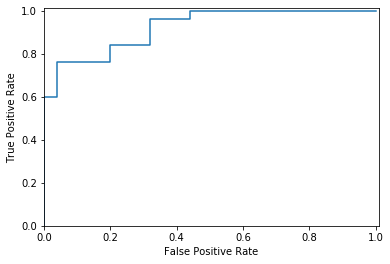

In [24]:
plot_roc_curve(y_test, y_probabilities[:, 1], pos_label=1)
plt.show()

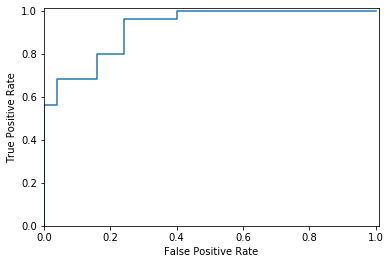

In [25]:
plot_roc_curve(y_test, y_probabilities[:, 0], pos_label=0)
plt.show()

### 4.2 Calculating the ROC AUC

In [26]:
def plot_roc_curve_plus_auc(y_true, y_score, pos_label=1, num_thresholds=100):
    
    # INSERT YOUR CODE FROM THE PREVIOUS EXERCISE HERE
    
    y_true_ary = np.array(y_true)
    y_score_ary = np.array(y_score)
    x_axis_values = []
    y_axis_values = []
    thresholds = np.linspace(0., 1., num_thresholds)  
    
    num_positives = np.sum(y_true == pos_label)
    num_negatives = y_true.shape[0] - num_positives
    
    for i, thr in enumerate(thresholds):
        binarized_scores = np.where(y_score >= thr, pos_label, int(not pos_label))
        
        positive_predictions = (binarized_scores == pos_label)
        num_true_positives = (y_true[positive_predictions] == pos_label).sum()
        num_false_positives = (y_true[positive_predictions] != pos_label).sum()
        
        x_axis_values.append(num_false_positives / float(num_negatives))
        y_axis_values.append(num_true_positives / float(num_positives))
        
    plt.step(x_axis_values, y_axis_values, where='post')
    
    plt.xlim([0., 1.01])
    plt.ylim([0., 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    # MODIFY IT SUCH THAT IT ALSO RETURNS THE ROC Area Under the Curve
    
    direct = 1
    difference = np.diff(x_axis_values)
    if np.any(difference < 0):
        if np.all(difference <= 0):
            direct = -1
                
    roc_auc = direct * np.trapz(x_axis_values,y_axis_values)
    return roc_auc

ROC AUC: 0.1032


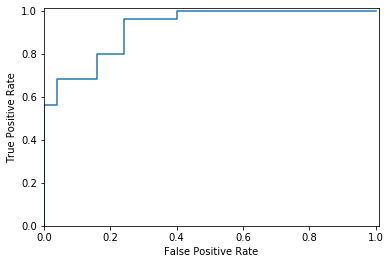

In [27]:
auc = plot_roc_curve_plus_auc(y_test, y_probabilities[:, 0], pos_label=0)
print('ROC AUC: %.4f' % auc)

ROC AUC: 0.1032


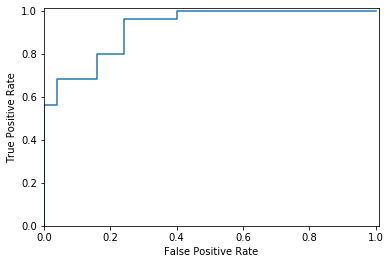

In [28]:
auc = plot_roc_curve_plus_auc(y_test, y_probabilities[:, 0], pos_label=0)
print('ROC AUC: %.4f' % auc)

## 5. Feature Importance

### 5.1 Drop-Column Feature Importance

In [29]:
import pandas as pd

df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)

Implement the feature_importance_dropcolumn function to compute the feature importance according the Drop-Column method discussed in class.
Here, use the cross_val_score function from scikit-learn to compute the acccuracy as the average accuracy from 5-fold cross-validation.

In [31]:
import numpy as np
from sklearn.model_selection import cross_val_score

def feature_importance_dropcolumn(estimator, X, y, cv=5):
    
    base_accuracy = np.mean(cross_val_score(estimator,X,y,cv=5))
    column_indices = np.arange(X.shape[1]).astype(int)
    drop_accuracies = np.zeros(column_indices.shape[0])

    for idx in column_indices:
        mask = np.ones(column_indices.shape[0]).astype(bool)
        mask[idx] = False
        drop_accuracy = np.mean(cross_val_score(estimator, X[:,list(mask)], y ,cv=5))        
        drop_accuracies[idx] = base_accuracy - drop_accuracy

    return drop_accuracies

Use a KNeighborsClassifier with 5 nearest neighbors.

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipe = make_pipeline (StandardScaler(), KNeighborsClassifier(n_neighbors = 5))

feature_importance_dropcolumn(pipe, X_train, y_train)

array([ 8.66666667e-03, -8.00000000e-03,  8.00000000e-03,  8.00000000e-03,
        8.33333333e-03,  8.00000000e-03,  1.60000000e-02, -8.00000000e-03,
       -8.00000000e-03,  0.00000000e+00,  0.00000000e+00, -2.22044605e-16,
        2.43333333e-02])

### 5.2 Random Forest Feature Importance

##### Use a random forest with 200 estimators and random seed 0.

In [33]:
from sklearn.ensemble import RandomForestClassifier
drop_importances = feature_importance_dropcolumn(RandomForestClassifier(n_estimators = 200,random_state = 0),
                                                 X=X_train,
                                                 y=y_train,
                                                 cv=5)
print('Drop Importance from RF:', drop_importances)

Drop Importance from RF: [ 0.    -0.008  0.    -0.008  0.    -0.008 -0.016 -0.016 -0.016  0.
 -0.016 -0.008 -0.008]


In [34]:
rank_drop_importances = np.argsort(drop_importances)
rank_drop_importances

array([ 6,  7,  8, 10,  1,  3,  5, 11, 12,  0,  2,  4,  9])

In [35]:
print("The 3 MOST IMPORTANT FEATURES")
print("Indices:",rank_drop_importances[0:3])
print("Columns:", list(df_wine.columns[1:][rank_drop_importances[0:3]]))

The 3 MOST IMPORTANT FEATURES
Indices: [6 7 8]
Columns: ['Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins']


##### Use a random forest with 100 estimators and random seed 0.

In [36]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

feature_importance = feature_importance_dropcolumn(forest, 
                                    X = X_test, 
                                    y = y_test, 
                                    cv = 5)

print('Random Forest Feature Importance:\n', feature_importance)

Random Forest Feature Importance:
 [0.03636364 0.03636364 0.01818182 0.01818182 0.03636364 0.03636364
 0.03636364 0.01818182 0.01818182 0.01818182 0.01818182 0.
 0.03636364]


In [37]:
rank_feature_importance = np.argsort(forest.feature_importances_)
rank_feature_importance

array([ 3,  2,  7,  8,  1,  4,  5, 10,  0, 11,  9,  6, 12])

In [38]:
print("3 MOST IMPORTANT FEATURES")
print("Indices:", rank_feature_importance[0:3])
print("Columns:", list(df_wine.columns[1:][rank_feature_importance[0:3]]))

3 MOST IMPORTANT FEATURES
Indices: [3 2 7]
Columns: ['Alcalinity of ash', 'Ash', 'Nonflavanoid phenols']


##### Use a random forest with random seed 0 and 50 permutation rounds.

In [39]:
from mlxtend.evaluate import feature_importance_permutation

forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

mean_importance_vals, all_importance_vals = feature_importance_permutation(X_test,
                                                                           y_test,
                                                                           forest.predict, 
                                                                           'accuracy', 
                                                                           50, 0)

print('Random Forest Feature Importance Permutation:\n',mean_importance_vals )

Random Forest Feature Importance Permutation:
 [0.02740741 0.         0.         0.         0.         0.
 0.04296296 0.         0.         0.10296296 0.00666667 0.02074074
 0.08185185]


In [40]:
rank_feature_importance_permutation = np.argsort(mean_importance_vals)
rank_feature_importance_permutation

array([ 1,  2,  3,  4,  5,  7,  8, 10, 11,  0,  6, 12,  9])

In [41]:
print("The 3 MOST IMPORTANT FEATURES")
print("Indices:", rank_feature_importance_permutation[0:3])
print("Columns:", list(df_wine.columns[1:][rank_feature_importance_permutation[0:3]]))

The 3 MOST IMPORTANT FEATURES
Indices: [1 2 3]
Columns: ['Malic acid', 'Ash', 'Alcalinity of ash']


### 5.3 Creating your Own Feature Selection Transformer Class

In [42]:
from sklearn.base import BaseEstimator
import numpy as np

class ColumnSelector(BaseEstimator):
    
    def __init__(self, cols=None):
        self.cols = cols
    
    def fit_transform(self, X, y=None):
        return self.transform(X=X, y=y)

    def transform(self, X, y=None):
        feature_subset = X[:, self.cols]
        if len(feature_subset.shape) == 1:
            feature_subset = feature_subset[:, np.newaxis]
        return feature_subset
    
    def fit(self, X, y=None):
        return self

In [43]:
import pandas as pd

df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)

In [45]:
col_sele = ColumnSelector(cols=[0, 5, 8, 11])
reduced_subset = col_sele.transform(X_train)

print('Original feature set size:', X_train.shape)
print('Selected feature set size:', reduced_subset.shape)

Original feature set size: (124, 13)
Selected feature set size: (124, 4)


Use the feature_importances_ attribute from a fitted random forest model inside a custom feature selector. Using this feature selector.

In [46]:
from sklearn.base import BaseEstimator
import numpy as np

class ImportanceSelector(BaseEstimator):
    
    def __init__(self, num_features, random_forest_estimator):
        self.num_features = num_features
        self.forest = random_forest_estimator
        
    def transform(self, X, y=None):
        
        # Feature by increasing feature importance:
        features_by_importance = np.argsort(self.forest.feature_importances_) # YOUR CODE
        top_k_feature_indices = features_by_importance[0:self.num_features] # YOUR CODE
        
        feature_subset = X[:, top_k_feature_indices]
        
        if len(feature_subset.shape) == 1:
            feature_subset = feature_subset[:, np.newaxis]
        return feature_subset
    
    def fit(self, X, y=None):
        self.forest.fit(X, y)
        return self

Use the ImportanceSelector to select the 3 most important features in the dataset

In [47]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=123)

selector = ImportanceSelector(num_features=3, random_forest_estimator=forest) # YOUR CODE
selector.fit(X_train, y_train) # YOUR CODE
reduced_train_features = selector.transform(X_train, y_train) # YOUR CODE

print('Original feature set size:', X_train.shape)
print('Selected feature set size:', reduced_train_features.shape)
print('First 5 rows:\n', reduced_train_features[:5])

Original feature set size: (124, 13)
Selected feature set size: (124, 3)
First 5 rows:
 [[ 2.35  0.47 20.  ]
 [ 2.7   0.5  19.5 ]
 [ 2.7   0.29 22.5 ]
 [ 2.65  0.29 19.  ]
 [ 2.2   0.63 18.5 ]]
